> [Logistic Regression](https://youtu.be/XnHqv4PC0-M?list=PLQ28Nx3M4Jrguyuwg4xe9d9t2XE639e5C)

# Lec

## Logistic Regression

* Logistic Regression?
  - Classification
  - Logistic vs Linear
* Solving
  - Hpothesis Representation
  - Sigmoid/Logistic Function
  - Decision Boundary
  - Cost Function
  - Optimizer (Gradient Descent)
* Summary

## Classification

* Exam: **PASS** or **FAIL
* Spam: **Ham** or **Spam**
* Face: **Real** or **Fake**

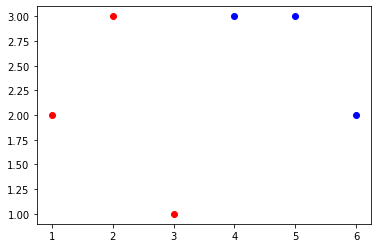

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.array([
  [1, 2, 0],
  [2 ,3, 0],
  [3, 1, 0],
  [4, 3, 1],
  [5, 3, 1],
  [6, 2, 1],
])

yes = np.array(list(map(lambda x: x[0:2], filter(lambda x: x[2], data))))
no  = np.array(list(map(lambda x: x[0:2], filter(lambda x: x[2] == 0, data))))

plt.plot(yes[:, 0], yes[:, 1], 'bo')
plt.plot(no[:, 0], no[:, 1], 'ro')

## Logistic vs Linear

Logistic에서는 위와 같은 점을 구분하는 선을 구하는 것,

Linear는 점들을 가장 잘 대표하는 선을 구하는 것.

* Logistic
  - 구분 되는 값, 셀 수 있는 값
  - 신발 크기, 직원 수
* Linear
  - 연속적인 값
  - 시간, 무게

## Hypothesis

Test => Pass/Fail

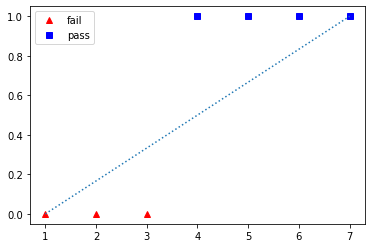

In [ ]:
ax = plt.axes()

ax.plot([i for i in range(1, 4)], [0 for i in range(1, 4)], 'r^', label='fail')
ax.plot([i for i in range(4, 8)], [1 for i in range(4, 8)], 'bs', label='pass')

plt.plot([1, 7], [0, 1], ":")
plt.legend()

## Decision Boundary

이렇게 만든 선을 가지고 0.5를 기준으로
그것보다 크면 1, 작으면 0을 내보낸다.

## Limit

이러한 선으로는 완벽하게 나타낼 수가 없다.

다시 말하면 구분은 가능하다.
하지만 Cost를 구하면 결과 값이 잘 나옴에도 불구하고 여전히 실제 데이터와는 차이가 많이 나게 된다.

그래서 어떠한 지점을 기준으로 꺾이는 모양이 필요하다.

그것이 Logistic, Sigmoid 함수이다.

## Sigmoid

S자 처럼 생긴, 0~1 사이의 값을 돌려주는 함수이다.

$$
g(z) = \frac 1 {(1+e^{-z})}
$$

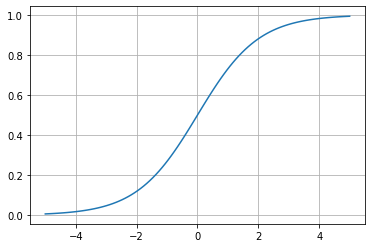

In [ ]:
g = lambda z: 1 / (1 + np.exp(-z))

x = np.linspace(-5, 5, 100)
y = list(map(g, x))
plt.plot(x, y)
plt.grid()

위 z값에 linear regression의 결과를 넣어준다.

## Cost Function

Linear regression과 동일한 cost함수를 사용하면 다음과 같다.

Text(0, 0.5, 'cost')

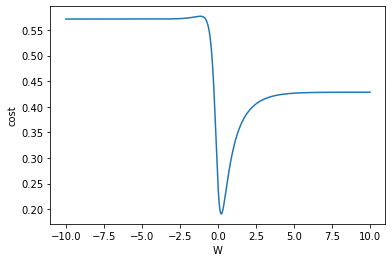

In [ ]:
data = np.array([
  [1, 0],
  [2, 0],
  [3, 0],
  [4, 1],
  [5, 1],
  [6, 1],
  [7, 1],
])

x_data = data[:,0]
y_data = data[:,1]

hypothesis = lambda w, x: w * x
logistic_hypothesis = lambda w, x: 1 / (1 + np.exp(-hypothesis(w, x)))
xs = []
ys = []

for W in np.arange(-10, 10, 0.01):
  xs.append(W)
  ys.append(np.mean(np.square(logistic_hypothesis(W, x_data) - y_data)))
plt.plot(xs, ys)
plt.xlabel("W")
plt.ylabel("cost")

여기서 볼 수 있듯이 global minimum으로 올 수 없는 초기 W값이 존재한다. => Convex한 곡선이 아니다.

cost에서 log를 사용해서, cost를 필요에 따라 기하 급수적으로 늘리고 0으로 만들 수 있다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply


Text(0, 0.5, 'cost')

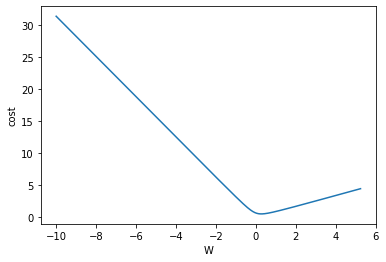

In [ ]:
data = np.array([
  [1, 0],
  [2, 0],
  [3, 0],
  [4, 1],
  [5, 1],
  [6, 1],
  [7, 1],
])

x_data = data[:,0]
y_data = data[:,1]

hypothesis = lambda w, x: w * x
logistic_hypothesis = lambda w, x: 1 / (1 + np.exp(-hypothesis(w, x)))
xs = []
ys = []

for W in np.arange(-10, 10, 0.01):
  xs.append(W)
  h = logistic_hypothesis(W, x_data)
  ys.append(np.mean(-y_data * np.log(h) - (1 - y_data) * np.log(1 - h)))
plt.plot(xs, ys)
plt.xlabel("W")
plt.ylabel("cost")

좀 나은 모양이 나왔다.

# LAB

## Optimization

In [ ]:
import tensorflow as tf

data = np.array([
  [1, 2, 0],
  [2 ,3, 0],
  [3, 1, 0],
  [4, 3, 1],
  [5, 3, 1],
  [6, 2, 1],
], dtype=np.float32)

X = data[:, 0:-1]
Y = data[:, -1]

W = tf.Variable(tf.random.normal([x_data.shape[1], 1]))
b = tf.Variable(tf.random.normal([1]))

lr = 0.005

for i in range(10000+1):
  with tf.GradientTape() as tape:
    hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
    cost = -tf.reduce_mean(Y * tf.math.log(hypothesis) + (1 - Y) * tf.math.log(1 - hypothesis))
  W_grad, b_grad = tape.gradient(cost, [W, b])

  W.assign_sub(W_grad * lr)
  b.assign_sub(b_grad * lr)

  if i % 200 == 0:
    print("{:5} | {:12.4f}".format(i, cost.numpy(), W_grad.numpy()))

    0 |       0.9762
  200 |       0.7066
  400 |       0.7024
  600 |       0.6999
  800 |       0.6984
 1000 |       0.6975
 1200 |       0.6969
 1400 |       0.6966
 1600 |       0.6963
 1800 |       0.6961
 2000 |       0.6960
 2200 |       0.6959
 2400 |       0.6958
 2600 |       0.6957
 2800 |       0.6956
 3000 |       0.6955
 3200 |       0.6954
 3400 |       0.6954
 3600 |       0.6953
 3800 |       0.6952
 4000 |       0.6951
 4200 |       0.6951
 4400 |       0.6950
 4600 |       0.6949
 4800 |       0.6949
 5000 |       0.6948
 5200 |       0.6948
 5400 |       0.6947
 5600 |       0.6947
 5800 |       0.6946
 6000 |       0.6946
 6200 |       0.6945
 6400 |       0.6945
 6600 |       0.6944
 6800 |       0.6944
 7000 |       0.6943
 7200 |       0.6943
 7400 |       0.6943
 7600 |       0.6942
 7800 |       0.6942
 8000 |       0.6942
 8200 |       0.6941
 8400 |       0.6941
 8600 |       0.6941
 8800 |       0.6940
 9000 |       0.6940
 9200 |       0.6940
 9400 |      

## Keras version

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


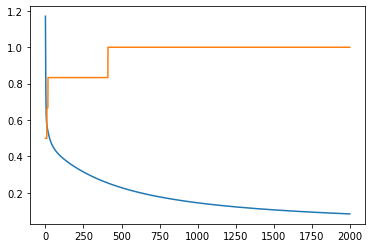

In [84]:
from tensorflow import keras

data = np.array([
  [1, 2, 0],
  [2 ,3, 0],
  [3, 1, 0],
  [4, 3, 1],
  [5, 3, 1],
  [6, 2, 1],
], dtype=np.float32)

X = data[:, 0:-1]
Y = data[:, -1]

model = keras.Sequential()
model.add(keras.layers.Dense(1, 'sigmoid', input_dim=X.shape[1]))

# binary_crossentropy 함수를 썼을 때 결과가 더 잘 나온다고는 하는데,,, 잘 모르겠음
model.compile(loss='binary_crossentropy',
            optimizer=keras.optimizers.SGD(0.1), metrics=['accuracy'])
model.summary()

history = model.fit(X, Y, epochs=2000, verbose=0)
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

## with diabetes data

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


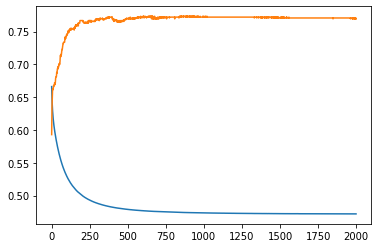

In [87]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("./data-03-diabetes.csv", delimiter=",", dtype=np.float32)
X = data[:, 0:-1]
Y = data[:, -1]

model = keras.Sequential()
model.add(keras.layers.Dense(1, 'sigmoid', input_dim=X.shape[1]))

model.compile(keras.optimizers.SGD(0.01), 'binary_crossentropy', ['accuracy'])
model.summary()

history = model.fit(X, Y, epochs=2000, verbose=0)

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])